#### The data: Gender-Science Implicit Association Test (IAT) and demographics

The Gender-Science Implicit Association Test (IAT) is a psychological reaction-time measure of how quickly people can pair female versus male names with words representing sciences versus liberal arts. In other words, it measures people's gut-reaction stereotypes that "male" goes with "science" more than "female" does. You can take the test yourself at https://implicit.harvard.edu/implicit/selectatest.html, and view basic statistical information at pi-liz.shinyapps.io/explore-iat/; see Gender-Science tab on the left. 

Implicit Association Test (IAT) scores tend to range from about -1.5 to about 1.5, and the average score for Gender-Science is about .35. Higher positive scores indicate a greater mental association/stereotype linking "male" to "science" than "female" to "science", while negative scores indicate a stronger association between "female" and "science". The data I use here has 8,000 people who took the Gender-Science IAT, including their scores, their own demographic information, and the year in which their data was recorded. 

#### Let's get started with setup!

In [1]:
import numpy as np
import pandas 
import matplotlib as plt
import seaborn as sns
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels

/Users/lizredford/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
genderiat = pandas.read_csv('gendersciiatdat.csv')

In [3]:
# Give each participant a number; this'll be used later in Item 3 for the gender t-test
genderiat['participant_number'] = range(1, len(genderiat) + 1)

#### It looks like some gender responses are "."; assume to be missing at random and remove.

In [4]:
genderiat['sex'].value_counts()
genderiat.drop(genderiat[genderiat.sex == "."].index, inplace=True)

#### In anticipating the later steps, let's also deal with the rest of the missing data now. 

Political ideology, which we'll look at later, has "NaN" values, so let's remove those. Moreover, for Step 4, many algorithms can't deal with missing data. Let's use dropna to drop missing values from the whole dataset. 

In [5]:
genderiat = genderiat.dropna(axis=0)

# Reset index or some row numbers will be missing from removing NAs
genderiat = genderiat.reset_index(drop = True)

#### How IAT scores are distributed:

(array([1.000e+00, 0.000e+00, 0.000e+00, 4.000e+00, 3.000e+00, 2.100e+01,
        5.700e+01, 1.180e+02, 2.920e+02, 4.030e+02, 6.770e+02, 9.060e+02,
        1.092e+03, 1.219e+03, 1.021e+03, 8.070e+02, 4.530e+02, 1.690e+02,
        4.300e+01, 1.000e+01]),
 array([-1.78898611, -1.62361315, -1.45824019, -1.29286724, -1.12749428,
        -0.96212132, -0.79674836, -0.6313754 , -0.46600244, -0.30062948,
        -0.13525652,  0.03011644,  0.1954894 ,  0.36086235,  0.52623531,
         0.69160827,  0.85698123,  1.02235419,  1.18772715,  1.35310011,
         1.51847307]),
 <a list of 20 Patch objects>)

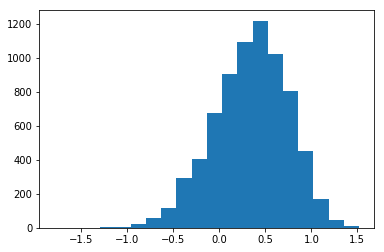

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(genderiat['implicit'], bins = 20) 

#### And then a quick view of the variables we have:

In [7]:
genderiat.head()

,implicit,explicit,raceomb,sex,politics,year,age,education,participant_number
0,1.013018,4.5,6.0,f,3.0,2012,21.0,6.0,1
1,0.438193,5.0,6.0,f,4.0,2010,17.0,3.0,2
2,-0.015030,4.0,6.0,f,4.0,2013,25.0,7.0,4
3,0.425197,4.5,6.0,m,2.0,2007,23.0,8.0,6
4,0.719349,4.0,3.0,f,4.0,2015,18.0,5.0,7


# Visualize by year

#### First, let's look at a list of the average IAT scores for each year.

In [9]:
print(genderiat.groupby('year')['implicit'].mean())

year
2007    0.394552
2008    0.360427
2009    0.360888
2010    0.373369
2011    0.344624
2012    0.360623
2013    0.328445
2014    0.312847
2015    0.308335
Name: implicit, dtype: float64


#### Now let's visualize those average IAT scores by year.

Text(0,0.5,'Association of male with science')

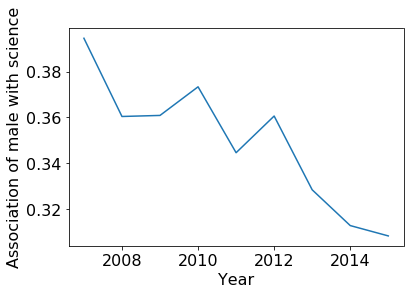

In [10]:
# plot yearwise iat scores averages by year
plt.plot([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015], genderiat.groupby('year')['implicit'].mean())
plt.xlabel('Year')
plt.ylabel('Association of male with science')

#### It looks like implicit stereotypes linking "male" to "science" more strongly than "female" to "science" may be on the decline.

# Visualize within most recent year

## A. IAT scores by gender in 2015
#### Participants had the option of reporting their gender as "female" or as "male".

#### Let's create a dataframe with only data from 2015. This leaves us with about 1500 rows, probably providing plenty of power to do significance testing in Item 3.

In [11]:
genderiat2015 = genderiat[genderiat.year == 2015]
len(genderiat2015)

1472

#### Now let's visualize IAT scores by gender!

/Users/lizredford/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


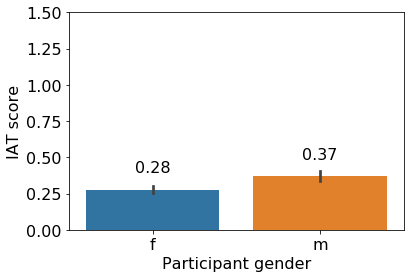

In [12]:
# Make barplot
import seaborn as sns
sns.barplot(x='sex', y='implicit', data=genderiat2015)
plt.ylim(0, 1.5)
plt.xlabel('Participant gender', fontsize=16)
plt.ylabel('IAT score', fontsize=16)

# Make some labelsb
barlabels = genderiat2015.groupby('sex')['implicit'].mean() # make list of values with which to label bars
values = round(barlabels, 2) # round the values

labels = [str(i) for i in values]

for x, y, label in zip(range(len(values)), values, labels):
    plt.text(x, y + .1, label, ha='center', va='bottom')

#### Looks like men may have stronger associations of "male" with "science" than women do.
You'll notice I allowed the y-axis to range from 0 to 1.5; I believe this is a better representation of the differences than "zooming in" by having the y-axis range from, say, 0 to .5. 

## B. IAT scores by political ideology in 2015
#### Political ideology is measured on a scale of 1 - 7 with 1 being most conservative and 7 being most liberal. So to make things easy, let's call it a measure of participant liberalism from now on.

In [13]:
# Check for missing or strange values
genderiat2015['politics'].value_counts()

4.0    401
6.0    390
7.0    277
5.0    160
2.0    106
3.0    104
1.0     34
Name: politics, dtype: int64

#### Let's visualize IAT scores by political ideology! For easy comparison to our gender visualization, let's start with a barplot.

/Users/lizredford/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


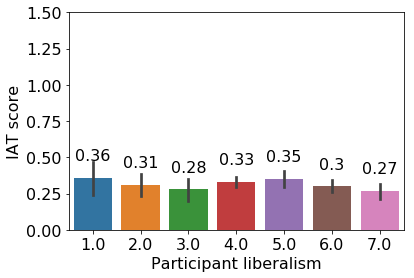

In [14]:
# Make barplot
import seaborn as sns
sns.barplot(x='politics', y='implicit', data=genderiat2015)
plt.ylim(0, 1.5)
plt.xlabel('Participant liberalism', fontsize=16)
plt.ylabel('IAT score', fontsize=16)

# Make some labelsb
barlabels = genderiat2015.groupby('politics')['implicit'].mean() # make list of values with which to label bars
values = round(barlabels, 2) # round the values

labels = [str(i) for i in values]

for x, y, label in zip(range(len(values)), values, labels):
    plt.text(x, y + .1, label, ha='center', va='bottom')

#### Because political ideology is somewhat continuous, let's also check out a regression plot.

/Users/lizredford/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


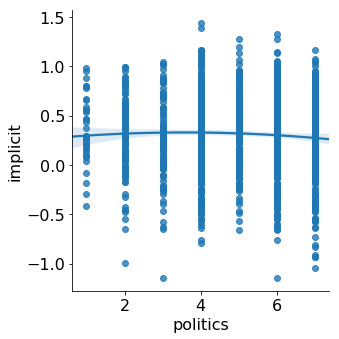

In [15]:
sns.lmplot(x='politics', y='implicit', order=2, data=genderiat2015) 

#### In the barplot, it looked like more liberal people may have weaker associations of "male" with "science" than more conservative people do, but here in the regression plot, the regression line looks flat. 

# Significance testing

## Are differences by gender significant?
#### We can answer this question with a independent t-test comparing IAT scores of females to males. 
Other methods you could use here would be ANOVA or regression with dummy coding.

In [17]:
import scipy
females = genderiat2015[genderiat2015['sex'] == 'f'].groupby('participant_number').mean()
males = genderiat2015[genderiat2015['sex'] == 'm'].groupby('participant_number').mean()
t,p = scipy.stats.ttest_ind(females['implicit'], males['implicit'])
print("t = ", round(t, 2))
print("p = ", round(p, 4))

# Print mean IAT scores by gender
print("Mean IAT scores by gender:")
print(genderiat2015.groupby('sex')['implicit'].mean())

t =  -4.24
p =  0.0
Mean IAT scores by gender:
sex
f    0.276941
m    0.371638
Name: implicit, dtype: float64


#### There's a significant effect of gender on IAT scores; men have a stronger mental association between "male" and "science" than women do.

## Are differences by political ideology significant?

#### If we treat political ideology as continuous, which is standard in the academic literature in this area, we can answer this question with a correlation coefficient and its significance level. 

In [18]:
r,p = scipy.stats.pearsonr(genderiat2015['politics'], genderiat2015['implicit'])
print(round(r, 2), round(int(p)))
print("r = ", round(r, 2))
print("p = ", round(p, 4))

-0.04 0
r =  -0.04
p =  0.1592


#### There is not a significant relationship between political ideology and IAT scores.

# Prediction

## Model building process

Because our outcome (IAT scores) is continuous, I chose to use linear regression to model the data.

To build the model, I selected features by checking for simple relationships of all variables to IAT scores. We already know that gender predicts IAT scores and political ideology does not, so let's look at the other variables: race, year, age, and education level.

#### Gender in this dataset

I'm going to choose not to include participant gender in the predictive model. That would require dummy-coding the variable, appending dummy codes to the dataset, and making sure those codes are not subjected to the scaling we do later.

#### Race in this dataset

I'm also going to choose not to include participant race here. It's measured in 9 distinct categories, and those group sizes are very unequal, as you can see below. This will result in biased parameter estimates. Moreover, to decompose the effect we'd have to do many pairwise comparisons, which may increase our false positive rate. 

In [19]:
genderiat['raceomb'].value_counts()

6.0    5600
5.0     344
8.0     332
2.0     312
9.0     301
3.0     253
7.0      66
1.0      56
4.0      32
Name: raceomb, dtype: int64

#### Explicit (self-reported) male--science associations predict IAT scores

In [20]:
r,p = scipy.stats.pearsonr(genderiat['explicit'], genderiat['implicit'])
print("r = ", round(r, 2))
print("p = ", round(p, 4))

r =  0.22
p =  0.0


 #### Age predicts IAT scores

In [21]:
r,p = scipy.stats.pearsonr(genderiat['age'], genderiat['implicit'])
print("r = ", round(r, 2))
print("p = ", round(p, 4))

r =  0.05
p =  0.0


#### Education level does not predict IAT scores

In [22]:
r,p = scipy.stats.pearsonr(genderiat['education'], genderiat['implicit'])
print("r = ", round(r, 2))
print("p = ", round(p, 4))

r =  -0.01
p =  0.3188


#### Year predicts IAT scores
Let's stop for a second to acknowledge that we're not correcting for temporal autocorrelation here, which is something we could consider with more time. But at least according to this simple correlation, year might have something to do with IAT scores.

In [23]:
r,p = scipy.stats.pearsonr(genderiat['year'], genderiat['implicit'])
print("r = ", round(r, 2))
print("p = ", round(p, 4))

r =  -0.06
p =  0.0


#### So now we know our features that significantly predict IAT scores in isolation: explicit (self-reported) male--science associations, age, and year. Let's combine them into a group of X variables.

We could consider other ways could incorporate these variables, such as including polynomial terms, or interactions between these variables. However, the more terms we add, the more we risk overfitting. At this point, let's keep it simple and just look at the linear coefficient for each variable.

In [24]:
# Select prediction target and call it y
y = genderiat['implicit']

# Choose features/predictors
X = genderiat[['explicit', 'year', 'age']]


#### Now we can split our data into training and validation sets.


In [25]:
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# Supplying a numeric value to the random_state argument guarantees we get the same split every time we
# run this script.
train_X, valdtn_X, train_y, valdtn_y = train_test_split(X, y, random_state = 0)

#### Inspect the size of the training and validation sets to ensure they are as expected.

In [26]:
print(len(train_X), len(valdtn_y))

5472 1824


In [ ]:
# Notes on scaling
# With more time, I'd scale all predictor variables so that discrepancies in means and ranges don't 
# have undue influence on the model. However, when I used this method, my predicted values were very unusual.
# To better stay in the time allotted, I'll acknowledge that scaling would be the surperior approach, but
# move on without doing so, noting that to do so I'd use code similar to this:
# from sklearn import preprocessing
# train_X_scaled = preprocessing.scale(train_X)

#### Run regression model

In [27]:
from sklearn import datasets, linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training set
regr.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
# Make and view predictions using the testing set
regr_pred = regr.predict(valdtn_X)
print(regr_pred)

[0.33960451 0.42558766 0.40284849 ... 0.23120933 0.36585899 0.37117628]


#### Evaluate the model

#### The mean squared error is .15. 
This indicates that on average our estimates deviated from actual scores by about .39. The average IAT score is about .35, so an average error of .39 is quite a lot.

In [29]:
# The mean squared error
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f"
      % mean_squared_error(valdtn_y, regr_pred))
import math
math.sqrt(mean_squared_error(valdtn_y, regr_pred))

Mean squared error: 0.15


0.38639008110291195

#### The variance score is .06.
This is quite low, which indicates relatively poor performance. We'll see this echoed below where we get to see the R squared for our model.

In [30]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(valdtn_y, regr_pred))

Variance score: 0.06


## Important variables

Let's start by asking for the coefficients for 'explicit', 'year', and 'age'.

In [32]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [ 0.10154323 -0.00757706  0.00137199]


#### Ok, so Sklearn will give us coefficients, but it doesn't actually give us a lot of the information we need to assess each predictor. 

What are their confidence intervals and significance levels? What proportion of the variance does the model actually predict? Sklearn is great for predicting, but to answer these important questions, let's run an OLS regression on the training set and inspect the wealth of information it provides.

In [34]:
X2 = sm.add_constant(train_X)
est = sm.OLS(train_y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               implicit   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     100.7
Date:                Mon, 24 Sep 2018   Prob (F-statistic):           1.89e-63
Time:                        17:42:33   Log-Likelihood:                -2640.9
No. Observations:                5472   AIC:                             5290.
Df Residuals:                    5468   BIC:                             5316.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.0558      3.974      3.789      0.0

#### How useful! Here, we can see our confidence intervals, which are pretty small, probably because of our large sample size.

We see that our R2 is about .05, which is small. We're predicting less than 6% of the variance in IAT scores. Thus, although our model is statisticall significant, its applied significance may be less than we'd hope.

We get also some additional diagnostics. For example, we can see that we have potentially problematic kurtosis, and maybe multicollinearity problems. With more time, I'd investigate and correct for these issues. But for the sake of time, let's just move forward assuming there are actually no issues with multicollinearity, kurtosis, etc.
In this case, we accept this model. Let's move on to assessing importance of variables.


#### Summary: most important variable(s) in predicting IAT scores

The regression output shows that "x1", or explicit (self-reported) associations of "male" with "science", has the highest coefficient. To assert actual statistically significant differences in coefficient size, we'd have to test the equality of each pair of coefficients independently. As a quick and dirty approach to that, let's note that explicit/x1's confidence interval does not include the confidence intervals of the other variables, which are lower. I'm sure there are more advanced metrics of this, but think that's beyond the scope of this task. For now, let's go ahead and say explicit associations are most important for predicting implicit association test scores.

Of course, variable importance depends a lot on the context of the data. For example, if a manipulated variable (e.g., teacher exposure to ANet coaching or assessment strategies) has a lower coefficient than a measured one (e.g., demographics of student body), it may still be more practically important because it's something we can actually influence.


# Executive Summary

We looked at data involcing the Gender-Science Implicit Association Test (IAT), a psychological measure of how quickly people can pair the concepts of female versus male with words representing sciences versus liberal arts. The data included 8,000 people who took the Gender-Science IAT, including their scores, their own demographic information, and the year in which their data was recorded.

### Visualize by year
It looked like implicit stereotypes linking "male" to "science" more strongly than "female" to "science" may be on the decline.

### Visualize within most recent year

#### By gender
It looked like men may have stronger associations of "male" with "science" than women do.

#### By political ideology
In the barplot, it looked like more liberal people may have weaker associations of "male" with "science" than more conservative people do, but in the regression plot, the regression line looked flat.

### Significance testing
There was a significant effect of gender on IAT scores; men have a stronger mental association between "men" and "science" than women do.

There was not a significant effect of political ideology on IAT scores.

### Prediction
Linear regression was the appropriate algorithm gien that IAT scores are continuous. I selected features by checking for simple relationships of all variables to IAT scores, choosing these predictors: explicit (self-reported) male--science associations, age, and year.

The model performed poorly, predicting only 5% of the variance in IAT scores. Further, on average predictions deviated from actual scores by about .39, where the mean IAT score is only .35.

The regression output showed that "x1", or explicit (self-reported) associations of "male" with "science", had the highest coefficient, but I discussed other nuances in choosing important variables.